# Congratulations on Completing Assignment 1🎉🎉

Hi Everyone! Hope you all had fun solving Assignment 1 and along with that you are all set to go to to the next part i.e. **Linear Regression**. Now although you might be familiar with it as an algorithm, it's still really easy to skip out on the minute details that go on behind the scenes.

Now we understand there might be people saying it's a waste of time to implement an algorithm from scratch but it's actually quite the opposite. If I explain you how to drive a car then you might understand the concept but the only way to understand is by driving it yourself.

Now that we have the stuff sorted out let's go ahead and see 2 shades...

Ahem, we mean 2 ways to implement Linear Regression i.e.:-

* Ordinary Least Squares
* Gradient Descent

## Loading the Dataset

Before Diving in let's get our data prepared. We'll be working on boston dataset present in [`sklearn.datasets.load_boston`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) or if you want to download the csv you can go [here](https://www.kaggle.com/fedesoriano/the-boston-houseprice-data). This will be our first task i.e. to load this dataset.

One tip I'll give is to play around with the data and get familiar with the format, the features it has and what new feature can be created. It might not being helpful for this assignment but it's a good habit to adapt to.

**Q. Load the boston house price dataset and, split it into training set and test set with 8:2 train-to-test ratio. Apply necessary pre-processing steps if any.**

In [ ]:
# YOUR CODE

# Shade 1: Ordinary Least Square

In the most over simplified statement Linear Regression is basically fitting a line in a curve. Which it true, sometimes. I guess it's more apt to say **Linear Regression fits a hyperplane in the given data set**. While we can dive down more on mathematical jargons let's move ahead and see the equation of this hyperplane:-

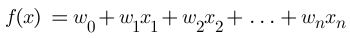

Well if we take xₒ = 1 it can be written as:-

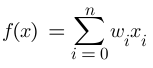

Out aim is to find out the weight matrix i.e. [wₒ,...,wₙ]. To do that that one very straight forward way available is to just use OLS equation and get the matrix. The formula for OLS is pretty straight forward:-

image.png

Simpler the better! Now that we know the formula let's go ahead and implement it outselves. One thing you should remember is that we are taking xₒ = 1 that means we'll need to add one more column to the data with all the rows as 1. You can do that by using `np.concatenate` if it's a numpy array or `df['new_col'] = 1` if it's a dataframe.

**Q1. Complete the following function to implement OLS from scratch.**

In [ ]:
def get_coeff_using_OLS(X, Y):
    # YOUR CODE
    pass

weights = get_coeff_using_OLS(x_train, y_train)

Noice! Now that you have the weights you need to use them to predict the values for a datapoint. It's important to note that both **X** and **W** are basically matrices hence if you want to get the hyperplace i.e. f(x), then you can just apply matrix multiplication to do so.



**Q2. Complete the following function to predict the values for `x_test` using the above calculated weights.**

In [ ]:
def predict(X, W):
    # YOUR CODE
    pass

y_preds = predict(x_test, weights)

Awesome! We are almost done all that is left is to find the error. It's obvious that predictions and ground truth values can't be the exact same there would be some difference between them. Hence you need to find the RMSE score for it. 

You can use `sklearn.metrics` to calculate it. I know, we are very generous 😊.

**Q3. Complete the following function to find the RMSE score for the given predictions.**

In [ ]:
def evaluate(y_test, y_preds):
    # YOUR CODE
    pass

evaluate(y_test, y_preds)

Great you're all done with implementing OLS from scratch! Now just one more step 🥲. I swear it's the last one, just use the above functions and implement them under a class for everyone to use. I mean does sklearn give you functions individually? No, right? So it's only fair that you do the same thing as them implement via classes 😏.

**Q4. Combine all the above functions and complete the class `OLSRegressor`. Also train and test it out on the given dataset.**

In [ ]:
class OLSRegressor:
    def __init__(self):
        """
        OLSRegressor class for training linear regression model
        based on the provided training data.
        """
        pass
    
    def fit(self, X, Y):
        """
        Perform OLS to find out the model coefficients.
        """
        pass
    
    def predict(self, X):
        """
        Predict the value via the trained model.
        """
        pass

    def score(self, y_true, y_pred):
        """
        Evaluate the predictions and return the RMSE Score.
        """
        pass

In [ ]:
# Testing the class
reg = OLSRegressor()
reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)
print(f'RMSE Score: {reg.score(y_test, y_pred):.4f}')

# Shade 2: Gradient Descent

Congratulations! You just created your first algorithm from scratch, now that we've done that let's move ahead and tame the bigger beast i.e. **Gradient Descent**. 

To keep it simple for you we'll be implementing **Simple Linear Regression** with 1 feature column and a target column. So let's understand the steps to train.

However, finding a real life dataset with one feature is a tricky task. So it's the perfect time to get to familiar with [`make_regression`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) a way to generate synthetic data for regression. For generating classification data we have something called [`make_classification`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification). 

```python
from sklearn.datasets import make_regression

x, y = make_regression()
```

It's actually pretty straightforward to use, but couple of parameters you should know about are:-

* **n_samples:** number of data-points.
* **n_features:** number of features.

**Q. Generate the data with 1000 datapoints and 1 feature then, split it into training set and test set with 8:2 train-to-test ratio.**

In [ ]:
# YOUR CODE

## Understanding Gradient Descent

Now that we have the data with us let's see how we can use it to train our model via Gradient Descent. Gradient Descent is actually an optimization that aims to find the local minima of a given function. In our case what we need is to find the following line:-

𝚢 = 𝚖𝚡 + 𝚌

So our main aim is to find optimal 𝚖 and 𝚌 that minimize our loss. In order to do that we'll follow the steps below:-
```
1. Randomly intialize 𝚖 and 𝚌.
2. Set a Learning Rate. Learning Rate is use to control the speed of convergence.
For N Iterations:
    For Every point x_i in Training set:
        3. Find prediction for x_i.
        4. Calculate and Add the the loss of this point to total_loss. 
    5. Print the SSR(Sum of Squared Residuals) loss. Division with 2 is just to make derivatives easier.
```
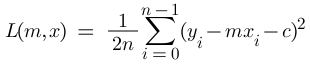
```
    6. Find Partial Derivative of the Loss w.r.t. 𝚖 and c.
```
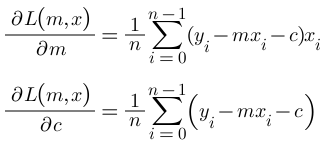
```
    7. Update m and c via the following step:-
        m -= α*∂/∂m(L(m,c))
        c -= α*∂/∂c(L(m,c))
    8. Repeat from step 2 for N iterations.
```

**Q. Given the steps above and your knowledge of classes from previous assignment and inferencing from `OLSRegressor` implement Simple Gradient Descent in the class `GDRegressor`. Also Plot the Loss at each epoch after the training is completed.**

In [ ]:
class GDRegressor:
    def __init__(self):
        """
        GDRegressor class for training linear regression model
        based on the provided training data.
        """
        pass
    
    def fit(self, X, Y):
        """
        Perform Gradient Descent to find out the model coefficients.
        """
        pass
    
    def predict(self, X):
        """
        Predict the value via the trained model.
        """
        pass
    
    def score(self, y_true, y_pred):
        """
        Evaluate the predictions and return the RMSE Score.
        """
        pass

In [ ]:
reg = GDRegressor()
reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)
print(f'RMSE Score: {reg.score(y_test, y_pred):.4f}')

Congratulations! You've completed implementing your 2nd and a rather tricky algorithm. Now we hope you had fun solving this interesting problem statement. But before leaving let's answer a few question to concrete the learning.

**Q. Compare the performance of you models with sklearn's inbuilt module for Linear Regression.**

In [ ]:
# YOUR CODE

## Q/A on Linear Regression

**Q1. What is Convergence in Gradient Decent?**

**Ans.**

**Q2. Explain the effect of Learning Rate on Convergence. Give appropriate proof to support your statement.**

**Ans.**

**Q3. Explain about stochiastic vs batch vs mini-batch Gradient Descent.**

**Ans.**

**Q4. Does initializing parameters differently affect convergence of GD? If yes, Why?**

**Ans**

**Q5. Gradient Descent can help achieve local minima. How can we assure that out model converges on global minima [Without using momentum].**

**Ans.**

**Q6. Write a breif paragraph explaining Bias, Variance and Bias-Variance Tradeoff. Why is it said that Linear Regression is a High Bias Estimator?**

**Ans.**

**Q7. How to use Gradient Descent for Linear Regression using sklearn?**

**Ans.**

**Q8. Explain about 4 assumptions of Linear Regression. Did you validate any before implementing the Algorithms?**

**Ans.**

**Q9[BONUS]. Explain Residual Analysis for validation of assumptions. What to do if validation fails?**

**Ans.**

## Bonus Shade: Multiple/Multivariate Linear Regression

**Q[BONUS]. Implement Multiple Gradient Descent and use it to Train and Test on Boston House Price Dataset.**

In [ ]:
class MultipleGDRegressor:
    def __init__(self):
        """
        MultipleGDRegressor class for training linear regression model
        based on the provided training data.
        """
        pass
    
    def fit(self, X, Y):
        """
        Perform Gradient Descent to find out the model coefficients.
        """
        pass
    
    def predict(self, X):
        """
        Predict the value via the trained model.
        """
        pass
    
    def score(self, y_true, y_pred):
        """
        Evaluate the predictions and return the RMSE Score.
        """
        pass

In [ ]:
reg = MultipleGDRegressor()
reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)
print(f'RMSE Score: {reg.score(y_test, y_pred):.4f}')